In [7]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import seaborn as sns
sns.set_theme(style='darkgrid')

seed = 2021

# Présentation de la mission du stage et de la chaire Good in Tech

# Présentation de la base german credit scoring / cas d'usage (prédiction risque de défaut)

Pour étudier les différentes catégories de l'éthique de l'intelligence artificielle définies plus haut nous allons nous utiliser une version nettoyer de la base de données : [German Credit Risk](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)).
Cette base est mise à disposition par le professeur Hofmann et contient 1000 entrées avec 22 variables. Chaque entrée représente une personne qui a contracté un emprunt à une banque. Chaque personne est classée par 0 ou 1 si elle a remboursé ou non son crédit.

In [2]:
credit = pd.read_csv("data/german_credit_prepared.csv", sep=",", engine="python")
credit.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


 - default : 
     - 0 : a remboursé
     - 1 : a fait défaut
 - account_check_status : 
     - ... < 0 DM
     - ... < 0 DM
     - 0 <= ... < 200 DM
     - ... >= 200 DM / salary assignments for at least 1 year
     - no checking account 
 - duration_in_month :
     
 - credit_history :
     - no credits taken/ all credits paid back duly
     - all credits at this bank paid back duly
     - existing credits paid back duly till now
     - delay in paying off in the past
     - critical account/ other credits existing (not at this bank) 
 - purpose :
     - car (new)
     - car (used)
     - furniture/equipment
     - radio/television
     - domestic appliances
     - repairs
     - education
     - (vacation - does not exist?)
     - retraining
     - business
     - others
 - credit_amount :
   
 - savings :
     - ... < 100 DM
     - 100 <= ... < 500 DM
     - 500 <= ... < 1000 DM
     - .. >= 1000 DM
     - unknown/ no savings account 
 - present_emp_since :
     - unemployed
     - ... < 1 year
     - 1 <= ... < 4 years
     - 4 <= ... < 7 years
     - .. >= 7 years

 - installment_as_income_perc :
 
 - sex :
     - male
     - female
 - personal_status :
     - single
     - divorced
     - married 
 - other_debtors : 
     - none
     - co-applicant
     - guarantor 
 - present_res_since :
 
 - property :
     - real estate
     - if not A121 : building society savings agreement/ life insurance
     - if not A121/A122 : car or other, not in attribute 6
     - unknown / no property 
 - age :
 
 - other_installment_plans :
     - bank
     - stores
     - none
 - housing : 
     - rent
     - own
     - for free
 - credits_this_bank :
 
 - job :
     - unemployed/ unskilled - non-resident
     - unskilled - resident
     - skilled employee / official
     - management / self-employed / highly qualified employee / officer 
 - people_under_maintenance : 
 
 - telephone :
     - none
     - yes
 - foreign_worker :
     - yes
     - no

# Création du modèle

En plus d'une base de données il faut un modèle sur lequel appliquer les différentes méthodes. On choisi ici une régression linéaire pour sa simplicité et ses bons résutats sur notre base de données. 
Il peut être également intéressant de noter que même sur des modèles simple comme une régression logistique une grande partie des problématiques de l'éthique de l'IA sont pertinantes. La discipline est plutôt récente mais elle ne provient pas de la compléxification des modèles statistiques bien que ce phenomène aggrave en générale les problèmes.

In [3]:
y = credit.default 
X = credit.drop(columns=["default"])

# class the variable between categorical and ordinal 
cat_variables = [col for col in X.columns if credit[col].dtype==object]
ord_variables = [col for col in X.columns if credit[col].dtype==int]

preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), cat_variables),
        ('ord', StandardScaler(), ord_variables)
    ])

model = Pipeline(
        [
            ('prepro', preprocess),
            ('logreg', LogisticRegression())
        ]
)

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                                                    test_size=0.20,
                                                                    random_state=seed)

logreg = model.fit(X_train, y_train)

# Présentation de la performance du modèle

In [5]:
def mesure_clas(model, X_test, y_test):
    """ Return some mesures on the classifier 'model'
    """
    
    y_test_pred = model.predict(X_test)
    results = classification_report(y_test, 
                                    y_test_pred,
                                    output_dict=True)

    disp = plot_confusion_matrix(model,
                                 X_test,
                                 y_test,
                                 cmap=plt.cm.Blues)
    _ = disp.ax_.set_title('Confusion matrix')
    plt.show()
    
    
    print("{:^12} {:^12} {:^12} {:^12}".format('Sensitivity', 
                                               'Specificity', 
                                               'Precision', 
                                               'Accuracy'))
    print("{:^12.2f} {:^12.2f} {:^12.2f} {:^12.2f}".format(results['0']['recall'], 
                                                           results['1']['recall'], 
                                                           results['1']['precision'],
                                                           results['accuracy']))

On regarde quatre mesures différentes : 
 - *Sensitivity* : la fraction de label 0 prédit correctement, ici la fraction de personnes qui ont remboursé qui sont prédit comme capable de rembourser sur la totalité des personnes qui sont prédit comme tel.
 - *Specificity* : la fraction de label 1 prédit correctement, ici la fraction de personnes qui ont fait défaut qui sont prédit comme incapable de rembourser sur la totalité des personnes prédites comme tel.
 - *Precision* : la fraction de label prédit comme 1 correct, ici la fraction de personnes prédites comme incapable de rembourser qui fait défaut sur la totalité des personnes ayant fait défaut.
 - *Accuracy* : la fraction de label correct sur la totalité des personnes, ici la fraction de personne donc le label est correct sur la totalité des personnes.

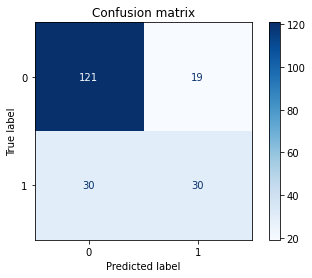

Sensitivity  Specificity   Precision     Accuracy  
    0.86         0.50         0.61         0.76    


In [6]:
mesure_clas(logreg, X_test, y_test)

On a donc un modèle qui est bon dans les mesures présentés ci-dessus. On va utiliser ce modèle dans les trois notebooks.